# Develop a Driver Drowsiness Detection System

In [ ]:
# Data Set Link from kaggale
https://www.kaggle.com/datasets/prasadvpatil/mrl-dataset

# Importing the necessary libraries for manipulate the data set.

In [1]:
import tensorflow as tf ## pip install tensorflow-gpu
import cv2 ### pip install opencv-python
##pip install opencv-contrib-python fullpackage
import os
import matplotlib.pyplot as plt ## pip install matlplotlib
import numpy as np ## pip install numpy Shift + Enter
import pandas as pd

In [ ]:
#Load the image and check the parameter 

In [2]:
img_array=cv2.imread("C:\\train\\Closed_Eyes\\s0001_00305_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

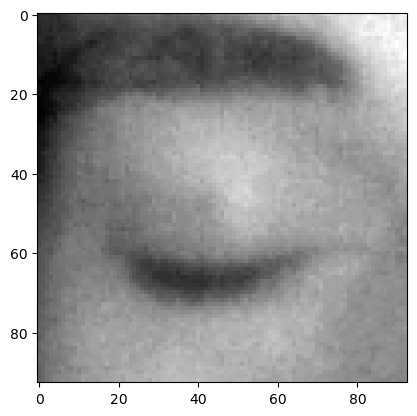

In [3]:

# Display the image using matplotlib
plt.imshow(img_array, cmap='gray')
plt.show()

# Code snippet:

This code snippet is intended to test or verify the reading and displaying of images from a specified dataset directory. It processes and displays the first image from the first category listed in Classes. This can be useful for quickly checking the content and format of the dataset.

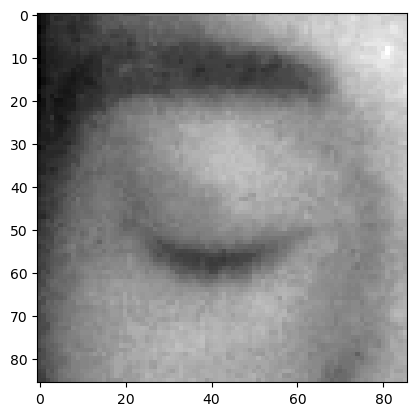

In [4]:
Datadirectory = "C:\\train" ##training dataset
Classes =["Closed_Eyes", "Open_Eyes"] ## List of classes
for category in Classes:
    path=os.path.join(Datadirectory, category) ##//
    for ing in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, ing), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

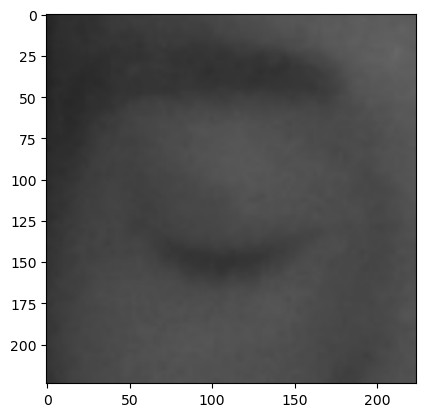

In [5]:
# Assuming backtorgb is already defined
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))

# Correct the typo in the argument name
plt.imshow(new_array, cmap="gray")
plt.show()

# Reading all the images and converting them into an array for data and labels.

# Code Snippet:

In [6]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 01,
        for img in os.listdir (path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array= cv2.resize(backtorgb, (img_size,img_size)) 
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [7]:
create_training_Data()

In [8]:
print(len(training_Data))

4000


In [9]:
import random 

random.shuffle(training_Data)

In [10]:
X=[]
y=[]

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
    
X=np.array(X).reshape(-1,img_size,img_size,3)

In [11]:
X.shape

(4000, 224, 224, 3)

In [12]:
X=X/225.0;

In [13]:
Y=np.array(y)

In [14]:
import pickle
pickle_out =open("X.pickle", "wb") 
pickle.dump(X, pickle_out) 
pickle_out.close()

pickle_out =open("y.pickle", "wb") 
pickle.dump(y, pickle_out) 
pickle_out.close()


In [15]:
pickle_in = open("X.pickle", "rb") 
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb") 
y = pickle.load(pickle_in)

# Deep Learning Model for Training-Transfer Learning

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model= tf.keras.applications.mobilenet.MobileNet()

In [18]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

# Transfer Learning

In [19]:
base_input =model.layers[0].input ## input


In [20]:
base_output =model.layers[-4].output

In [21]:
Flat_layer =layers.Flatten()(base_output)
final_output= layers.Dense (1)(Flat_layer) ## one node (1/0) 
final_ouput =layers.Activation('sigmoid')(final_output)

In [22]:
new_model= keras.Model(inputs =base_input, outputs= final_output)

# settings for binary classification (open / closed)

In [23]:
#settings for binary classification (open / closed)
new_model.compile(loss="binary_crossentropy", optimizer= "adam", metrics =["accuracy"])

In [24]:

new_model.fit(X, Y, epochs= 1, validation_split = 0.1) ## training



113/113 [==============================] - 246s 2s/step - loss: 0.4159 - accuracy: 0.9694 - val_loss: 0.0771 - val_accuracy: 0.9950


In [25]:
new_model.save('my_model.h5')


C:\Users\CB SUMANTH\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#This code loads a pre-trained Keras model from the file my_model.h5 into the variable new_model, 
#allowing you to use or fine-tune the model for further tasks.

In [26]:
new_model =tf.keras.models.load_model('my_model.h5')

# Checking Network for Prediction for Closed_eyes

In [ ]:
#network predicting

In [29]:
img_read =cv2.imread("C:\\train\\Closed_Eyes\\s0001_00368_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_read,cv2.COLOR_GRAY2RGB) 
new_array= cv2.resize(backtorgb, (img_size, img_size))

In [30]:
X_inp= np.array(new_array).reshape(1, img_size, img_size, 3)

In [31]:
X_inp.shape

(1, 224, 224, 3)

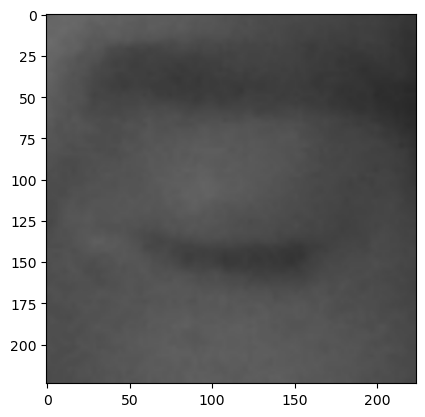

In [33]:
plt.imshow(new_array)

In [34]:
X_inp=X_inp/225.0;

In [35]:
prediction=new_model.predict(X_inp)

1/1 [==============================] - 1s 660ms/step


In [36]:
prediction

array([[-43.241657]], dtype=float32)

# Checking Network for Prediction for open_eyes

In [48]:
img_read2 =cv2.imread("C:\\train\\Open_Eyes\\s0001_02375_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_read2,cv2.COLOR_GRAY2RGB) 
new_array= cv2.resize(backtorgb, (img_size, img_size))

In [49]:
X_inp2= np.array(new_array).reshape(1, img_size, img_size, 3)

In [50]:
X_inp2.shape

(1, 224, 224, 3)

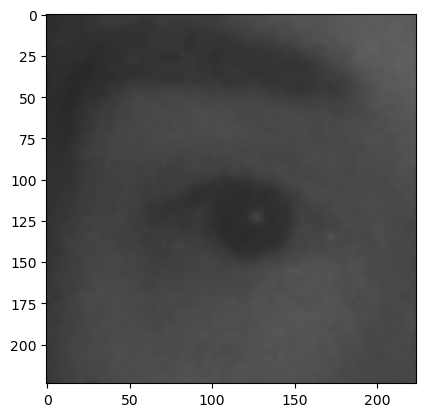

In [51]:
plt.imshow(new_array)

In [52]:
X_inp2=X_inp2/225.0;

In [53]:
prediction=new_model.predict(X_inp2)

1/1 [==============================] - 0s 60ms/step


In [54]:
prediction

array([[9.631355]], dtype=float32)

# Lets check unknown image

In [71]:
img=cv2.imread("C:\\train\\sad_women.png")

In [72]:
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

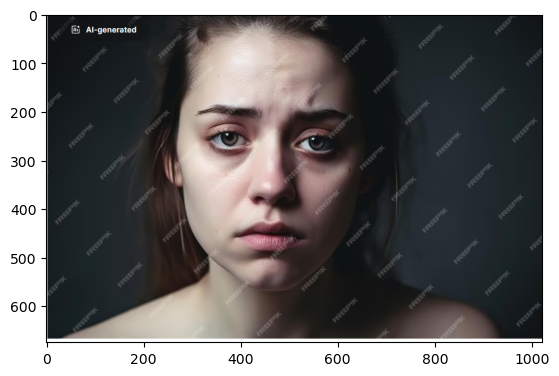

In [73]:
plt.imshow(rgb_image)

In [74]:
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

eye_cascade =cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')

In [75]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [76]:
eyes= eye_cascade.detectMultiScale (gray, 1.1,4)

In [77]:
for(x, y, w, h) in eyes: 
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

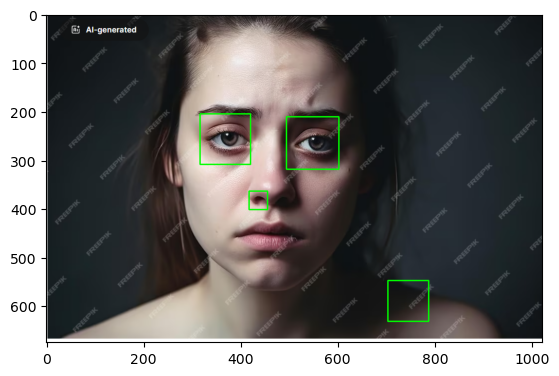

In [78]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [79]:
eye_cascade = cv2.CascadeClassifier (cv2.data.haarcascades +'haarcascade_eye.xml')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(faceCascade.empty())
eyes =eye_cascade.detectMultiScale(gray, 1.1,4)

for x,y,w,h in eyes:
    roi_gray= gray[y:y+h, x:x+w]
    roi_color= img[y:y+h, x:x+w]
    eyess =eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi =roi_color[ey: ey+eh, ex:ex + ew]

In [80]:
gray= cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB)

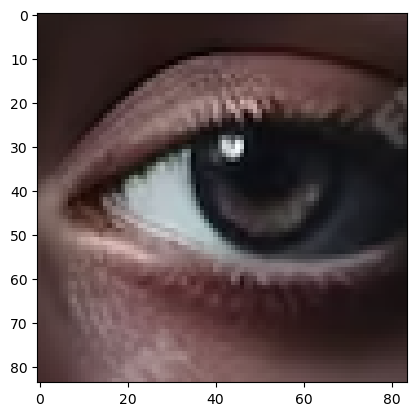

In [81]:
plt.imshow(gray)

In [82]:
gray.shape

(84, 84, 3)

In [83]:
final_image =cv2.resize(gray, (224,224))
final_image= np.expand_dims(final_image, axis= 0) ## need fourth dimension
final_image =final_image/255.0

In [84]:
final_image.shape

(1, 224, 224, 3)

In [85]:
new_model.predict(final_image)

1/1 [==============================] - 0s 63ms/step


array([[24.257353]], dtype=float32)

This script is designed to detect drowsiness in real-time using a webcam feed. It utilizes Haar cascades to detect faces and eyes, then employs a pre-trained deep learning model to classify whether the detected eyes are open or closed. If closed eyes are detected for a certain duration, an alert is triggered both visually and audibly. The system processes each frame from the webcam, converts it to grayscale for detection, and overlays relevant status information on the video feed.

Steps:

Initialize Haar Cascades and Webcam:
        1)Load Haar cascades for face and eye detection.
        2)Initialize the webcam, ensuring it opens correctly.


Capture and Process Frames:
        1)Continuously capture frames from the webcam.
        2)Convert each frame to grayscale for easier detection of features.

Detect Faces and Eyes:
        1)Use Haar cascades to detect faces and eyes in the grayscale frame.
        2)Draw rectangles around detected faces and eyes for visual feedback.

Classify Eye State:
        1)For detected eyes, preprocess the region of interest and classify it using the pre-trained model.
        2)Normalize the image and predict whether the eyes are open or closed.

Trigger Alerts:
        1)If eyes are detected as closed for a certain duration, draw alert messages on the frame.
        2)Trigger an audible beep to alert the user of potential drowsiness.
        3)Reset the counter after the alert is triggered.


This sequence ensures continuous monitoring and real-time feedback to help prevent drowsiness-related incidents.

In [90]:
import cv2
import numpy as np
import winsound

# Initialize the Haar cascades
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load your trained model (assume it's named 'new_model')
# new_model = ... (initialize your model here)

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

frequency = 2500
duration = 1000
counter = 0 

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    if len(eyes) > 0:
        ex, ey, ew, eh = eyes[0]
        eyes_roi = frame[ey:ey+eh, ex:ex+ew]
        final_image = cv2.resize(eyes_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0)  # Need fourth dimension
        final_image = final_image / 255.0

        predictions = new_model.predict(final_image)
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        if predictions > 0:
            status = "Open Eyes"
            cv2.putText(frame, status, (150, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
            x1, y1, w1, h1 = 0, 0, 175, 75  # Draw black background rectangle
            cv2.rectangle(frame, (x1, y1), (x1+w1, y1+h1), (0, 0, 0), -1)
            cv2.putText(frame, 'Active', (x1 + int(w1/10), y1 + int(h1/2)), font, 0.7, (0, 255, 0), 2)
        else:
            counter += 1
            status = "Closed Eyes"
            cv2.putText(frame, status, (150, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
            if counter > 5:
                x1, y1, w1, h1 = 0, 0, 175, 75
                cv2.rectangle(frame, (x1, y1), (x1+w1, y1+h1), (0, 0, 0), -1)
                cv2.putText(frame, 'Sleep Alert !!', (x1 + int(w1/10), y1 + int(h1/2)), font, 0.7, (0, 0, 255), 2)
                winsound.Beep(frequency, duration)
                counter = 0

    cv2.imshow('Drowsiness Detection', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 65ms/step


KeyboardInterrupt: 

# conclusion:

The implemented script effectively utilizes computer vision and deep learning techniques to monitor and detect drowsiness in real-time. By leveraging Haar cascades for facial and eye detection, and a pre-trained model for classifying the state of the eyes, the system provides a reliable method for identifying closed eyes. The integration of visual and audible alerts enhances its practicality for real-world applications, such as in driver assistance systems to prevent accidents due to drowsiness. This solution demonstrates the potential of combining traditional image processing with advanced machine learning models to address critical safety issues.